# AIM: My aim is to create a model which can be classify whether the content is ads or not ads ( classification problem)

In [76]:
#importing needed pakages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reading train data and test data

df_train=pd.read_csv("Data Sets_train.csv")
df_test=pd.read_csv("Data Sets_test.csv")


In [3]:
df_train.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [4]:
df_train.shape

(1157, 5)

In [5]:
df_train.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

# Data visualization

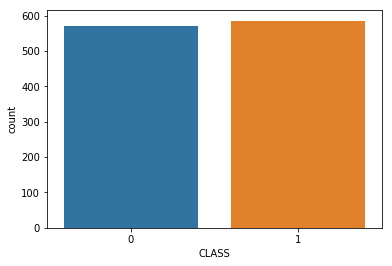

In [77]:
#shows class graph
sns.countplot(x="CLASS",data=df_train)

In [6]:
# copying our df_train dataframe into other variable ads
ads=df_train.copy()

In [7]:
ads.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


# Data preprocessing


In [8]:
# checking wheather our dataset contain any null values or not
ads.isnull().sum()

COMMENT_ID      0
AUTHOR          0
DATE          138
CONTENT         0
CLASS           0
dtype: int64

Our dataset contain 5 columns and out of it,In DATE columns there are 138 null values, for our perpose DATE column is not mandatory for creating our model, so we can avoid this column, other than this all other columns have no any null values .

In [9]:
ads.describe()

,CLASS
count,1157.000000
mean,0.506482
std,0.500174
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 5 columns):
COMMENT_ID    1157 non-null object
AUTHOR        1157 non-null object
DATE          1019 non-null object
CONTENT       1157 non-null object
CLASS         1157 non-null int64
dtypes: int64(1), object(4)
memory usage: 45.3+ KB


In [11]:
# Droping 'DATE' column for preprocessing
ads=ads.drop('DATE',axis=1)

In [12]:
ads.head()

,COMMENT_ID,AUTHOR,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,and u should.d check my channel and tell me wh...,1


In [16]:
ads_1=ads.drop(['COMMENT_ID','AUTHOR'],axis=1)

In [17]:
ads_1.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,Subscribe to my channel ﻿,1
4,and u should.d check my channel and tell me wh...,1


In [18]:
ads_1.shape

(1157, 2)

In [19]:
ads_1.columns

Index(['CONTENT', 'CLASS'], dtype='object')

In [20]:
ads_1['CONTENT'][6]

'https://twitter.com/GBphotographyGB\ufeff'

In [23]:
# stopwords and porterstemmer are used to removing special characters from the string
#In NLP  corpus means collection of texts


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(ads_1)):
    review = re.sub('[^a-zA-Z]', ' ', ads_1['CONTENT'][i])            #it will remove characters other than a-z,A-Z
    review = review.lower()                                         #it will convert all uppercase letters to lower case
    review = review.split()                                         #split is used because after this we need to applu stemming and stopwords
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]    #stemming is a normalization technique which is used to convert tokenized words into shorten root words eg:playing=play
    review = ' '.join(review)
    corpus.append(review)

In [25]:
corpus[3]

'subscrib channel'

In previous steps i have cleaned up all CONTENT special chararcters,lower case etc


In [26]:
## Get the Independent Features

X=ads_1.drop('CLASS',axis=1)

In [27]:
X.head()

,CONTENT
0,"Huh, anyway check out this you[tube] channel: ..."
1,me shaking my sexy ass on my channel enjoy ^_^ ﻿
2,watch?v=vtaRGgvGtWQ Check this out .﻿
3,Subscribe to my channel ﻿
4,and u should.d check my channel and tell me wh...


In [28]:
## Get the Dependent features

y=ads_1['CLASS']

In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: CLASS, dtype: int64

Next step is to convert our text data into vectors beacuse model can procss only numerical data ,so for that mainly we have some methods like countvactorization and TFid vectorizer.

count vectorizer we can count only the number of times a word appears in the documentswhich result in biasing in favour of most frequent words,this endup with ignoring rare words.

TFid vectorizer is used to overcome the count vectorizers problem , in Tfid we consider overall document weight of a word, it helps us in dealing with most frequent words, this will weights the word counts by a measure of how often they appear in the document.

In [30]:
## TFidf Vectorizer
# creating a bag of word model

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))  #ngram(1,3) means basicaly it is consider as one word but it contain 3 separate word
X =tfidf_v.fit_transform(corpus).toarray()


In [31]:
X.shape

(1157, 5000)

In [32]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
tfidf_v.get_feature_names()[:20]

['aa',
 'abl',
 'abomin',
 'absolut',
 'abus',
 'account',
 'account subscrib',
 'act',
 'act renew',
 'act renew rand',
 'activ',
 'actor',
 'actual',
 'ad',
 'adam',
 'adam beat',
 'adam whitney',
 'add',
 'add follow',
 'adf']

In above  'act renew rand ' is an eg of ngram_range(1,3)

In [34]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [35]:
#coverting to DataFrame
count_ads = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [36]:
count_ads.head()

,aa,abl,abomin,absolut,abus,account,account subscrib,act,act renew,act renew rand,...,yr,yr old,zonepa,zonepa com,zonepa com check,zonepa com make,zonepa com visit,zr,zr kcpj,zr kcpj amp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
count_ads.shape

(867, 5000)

In [38]:
#funtion for confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# MultinomialNaive Bayes Algorithm

In [39]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [40]:
from sklearn import metrics
import numpy as np
import itertools

In [41]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)


Accuracy:   0.903


Confusion matrix, without normalization


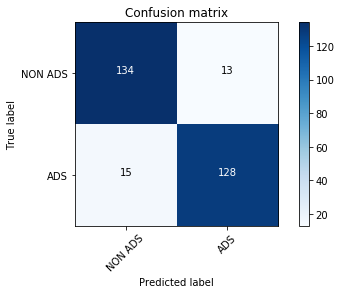

In [42]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['NON ADS', 'ADS'])

# Multinomial Naive Bayes Classifier with Hyperparameter

In [43]:
classifier=MultinomialNB(alpha=0.1)

In [44]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/home/sreerag-a/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8793103448275862
Alpha: 0.1, Score : 0.9
Alpha: 0.2, Score : 0.903448275862069
Alpha: 0.30000000000000004, Score : 0.903448275862069
Alpha: 0.4, Score : 0.906896551724138
Alpha: 0.5, Score : 0.9103448275862069
Alpha: 0.6000000000000001, Score : 0.9103448275862069
Alpha: 0.7000000000000001, Score : 0.906896551724138
Alpha: 0.8, Score : 0.903448275862069
Alpha: 0.9, Score : 0.903448275862069


In [45]:
## Get Features names
feature_names = tfidf_v.get_feature_names()
print(feature_names)

['aa', 'abl', 'abomin', 'absolut', 'abus', 'account', 'account subscrib', 'act', 'act renew', 'act renew rand', 'activ', 'actor', 'actual', 'ad', 'adam', 'adam beat', 'adam whitney', 'add', 'add follow', 'adf', 'adf ly', 'advanc', 'advertis', 'advertis chanc', 'advertis chanc get', 'advertis channel', 'advertis channel could', 'advertis simpl', 'advertis simpl thumb', 'africa', 'african', 'age', 'ago', 'ahhh', 'al', 'alcohol', 'aliv', 'almost', 'almost billion', 'alon', 'alreadi', 'alreadi got', 'alreadi got subscrib', 'also', 'also check', 'also free', 'also free differ', 'also like', 'also money', 'also money everyday', 'alway', 'amaz', 'amaz song', 'amend', 'amend right', 'amend right privaci', 'american', 'american un', 'american un patriot', 'amount', 'amp', 'amp campid', 'amp campid amp', 'amp customid', 'amp customid bogdan', 'amp hl', 'amp hl en', 'amp icep', 'amp icep vectorid', 'amp ipn', 'amp ipn psmain', 'amp kw', 'amp kw lg', 'amp kwid', 'amp kwid amp', 'amp mpt', 'amp mti

In [46]:
classifier.coef_[0]

array([-8.83587449, -8.7119693 , -8.56145086, ..., -8.83587449,
       -8.83587449, -8.83587449])

In [47]:
### Most occurence of ADS
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.235011365668155, 'check'),
 (-5.398820281805551, 'subscrib'),
 (-5.4859598509496, 'youtub'),
 (-5.619114239854847, 'video'),
 (-5.6834592031382085, 'check video'),
 (-5.695985471071599, 'check video youtub'),
 (-5.703380399907239, 'video youtub'),
 (-5.928003032715116, 'channel'),
 (-5.990619496596599, 'com'),
 (-6.0178097677298386, 'pleas'),
 (-6.111637960709194, 'http'),
 (-6.345699800748893, 'br'),
 (-6.433415770020696, 'playlist youtub'),
 (-6.433415770020696, 'playlist'),
 (-6.433415770020696, 'check playlist youtub'),
 (-6.433415770020696, 'check playlist'),
 (-6.555748620371565, 'like'),
 (-6.556409553431395, 'subscrib channel'),
 (-6.642696170857237, 'www'),
 (-6.675869689998986, 'http www')]

In [48]:
### Most occurence of NON ADS
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-8.835874491573094, 'aa'),
 (-8.835874491573094, 'ahhh'),
 (-8.835874491573094, 'al'),
 (-8.835874491573094, 'aliv'),
 (-8.835874491573094, 'almost'),
 (-8.835874491573094, 'almost billion'),
 (-8.835874491573094, 'also like'),
 (-8.835874491573094, 'amount'),
 (-8.835874491573094, 'amp hl'),
 (-8.835874491573094, 'amp hl en'),
 (-8.835874491573094, 'anthem'),
 (-8.835874491573094, 'anthem ft'),
 (-8.835874491573094, 'anthem ft lauren'),
 (-8.835874491573094, 'appl'),
 (-8.835874491573094, 'appl macbook'),
 (-8.835874491573094, 'applock'),
 (-8.835874491573094, 'applock amp'),
 (-8.835874491573094, 'applock amp hl'),
 (-8.835874491573094, 'asia'),
 (-8.835874491573094, 'asian'),
 (-8.835874491573094, 'autotun'),
 (-8.835874491573094, 'awesom song'),
 (-8.835874491573094, 'babi'),
 (-8.835874491573094, 'bad'),
 (-8.835874491573094, 'beauti girl'),
 (-8.835874491573094, 'bennett'),
 (-8.835874491573094, 'best parti'),
 (-8.835874491573094, 'best singer'),
 (-8.835874491573094, 'best so

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

/home/sreerag-a/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
pred_lr=LR.predict(X_test)

In [51]:
LR.score(X_test, y_test)

0.9206896551724137

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       147
           1       0.96      0.87      0.92       143

   micro avg       0.92      0.92      0.92       290
   macro avg       0.92      0.92      0.92       290
weighted avg       0.92      0.92      0.92       290




# Decision Tree Classification

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
pred_dt = DT.predict(X_test)

In [56]:
DT.score(X_test, y_test)

0.9482758620689655

In [57]:
DT.score(X_train, y_train)

0.9988465974625144

In [58]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       147
           1       0.98      0.91      0.95       143

   micro avg       0.95      0.95      0.95       290
   macro avg       0.95      0.95      0.95       290
weighted avg       0.95      0.95      0.95       290



# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train, y_train)

/home/sreerag-a/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [61]:
pred_rfc = RFC.predict(X_test)

In [62]:
RFC.score(X_test, y_test)

0.9206896551724137

In [63]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       147
           1       0.98      0.86      0.91       143

   micro avg       0.92      0.92      0.92       290
   macro avg       0.93      0.92      0.92       290
weighted avg       0.93      0.92      0.92       290



In [64]:
#test prediction of multinominal naive bayes classifier
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0])

In [67]:

# MultinomialNaive Bayes Algorithm IS GETTING BETTER ACCURACY WITH TEST ACCURACY  0.903
#SAVE THE MODEL TO DISK
import pickle
filename="ADS_class_model.pkl"
pickle.dump(classifier, open(filename, 'wb'))

In [69]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.903448275862069


# Roc_Auc_Score

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

In [71]:
# predict probabilities
nb_probs = classifier.predict_proba(X_test)

In [72]:
# keep probabilities for the positive outcome only
nb_probs = nb_probs[:, 1]

In [73]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, nb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MultinomialNaive Bayes: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
MultinomialNaive Bayes: ROC AUC=0.967


In [74]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

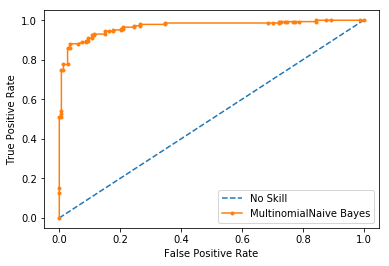

In [75]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(nb_fpr, nb_tpr, marker='.', label='MultinomialNaive Bayes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Roc_Auc_Score Evaluation Comparison of Multinominal,Decision Tree,Logistic Regression.

In [96]:
pred_prob1 = classifier.predict_proba(X_test)    #Multinominal
pred_prob2 = DT.predict_proba(X_test)            #Decision Tree
pred_prob3 = LR.predict_proba(X_test)            #Logistic Regression

In [97]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [99]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
print(auc_score1, auc_score2,auc_score3)

0.9670805385091099 0.9477427334570192 0.9808286951144094


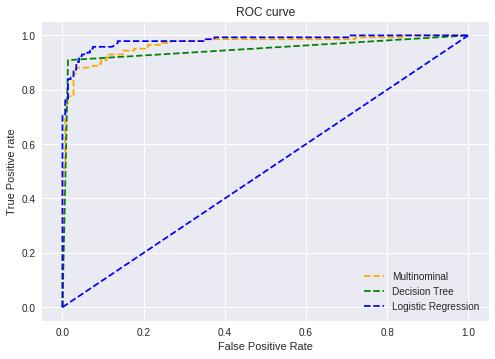

In [100]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Multinominal')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

It is evident from the plot that the AUC for the Logistic Regression ROC curve is higher than that for the Multinominal,Decision Tree ROC curve. Therefore, we can say that logistic regression did a better job of classifying the positive class in the dataset.

# TESTING WITH TEST DATASET

In [102]:
df_test

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a..."
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿
5,5,z13auhww3oufjn1qo04ci3grqqjmfjexxuo0k,Huckyduck,2013-11-28T17:06:17,Hey subscribe to me﻿
6,6,z121zxaxsq25z5k5o04ch1o5jqqfij3gtm40k,TheUploadaddict,2013-11-28T18:12:12,subscribe like comment﻿
7,7,z13vxpnoxsyeuv2jr04cctprprb1slnxdf4,OutrightIgnite,2013-11-28T21:55:02,http://www.ebay.com/itm/171183229277?ssPageNam...
8,8,z12qth5j0ob1fx3q404chvy4fz32tbkpllk0k,Tony K Frazier,2013-11-28T23:57:13,http://ubuntuone.com/40beUutVu2ZKxK4uTgPZ8K﻿
9,9,z13etj0bclzfztuwc04cgfvrgmf3fvjor1g,Jose Renteria,2013-11-29T00:22:01,We are an EDM apparel company dedicated to bri...


In [103]:
# copying our df_train dataframe into other variable ads
ads_test=df_test.copy()

In [104]:
# checking wheather our dataset contain any null values or not
ads_test.isnull().sum()

ID              0
COMMENT_ID      0
AUTHOR          0
DATE          107
CONTENT         0
dtype: int64

In [105]:
# Droping 'DATE' column for preprocessing
ads_test=ads_test.drop(['COMMENT_ID','AUTHOR','DATE'],axis=1)

In [106]:
ads_test.head()

,ID,CONTENT
0,0,Hey guys check out my new channel and our firs...
1,1,just for test I have to say murdev.com
2,2,"Hey, check out my new website!! This site is a..."
3,3,i turned it on mute as soon is i came on i jus...
4,4,You should check my channel for Funny VIDEOS!!﻿


In [107]:
# stopwords and porterstemmer are used to removing special characters from the string
#In NLP  corpus means collection of texts


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(ads_test)):
    review = re.sub('[^a-zA-Z]', ' ', ads_test['CONTENT'][i])            #it will remove characters other than a-z,A-Z
    review = review.lower()                                         #it will convert all uppercase letters to lower case
    review = review.split()                                         #split is used because after this we need to applu stemming and stopwords
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]    #stemming is a normalization technique which is used to convert tokenized words into shorten root words eg:playing=play
    review = ' '.join(review)
    corpus.append(review)

In [108]:
## TFidf Vectorizer
# creating a bag of word model

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))  #ngram(1,3) means basicaly it is consider as one word but it contain 3 separate word
x =tfidf_v.fit_transform(corpus).toarray()


In [109]:
x.shape

(799, 5000)

In [110]:
tfidf_v.get_feature_names()[:10]

['aaaaaaa',
 'absolut',
 'abus',
 'achiev',
 'acoust',
 'act',
 'actual',
 'adam',
 'add',
 'adf']

In [111]:

count__test_ads1 = pd.DataFrame(x, columns=tfidf_v.get_feature_names())

In [112]:
count__test_ads1.head()

,aaaaaaa,absolut,abus,achiev,acoust,act,actual,adam,add,adf,...,zr kcpj,zr kcpj amp,zuf,zuf mb,zuf mb lnuj,zvrrp,zvrrp qgtw,zvrrp qgtw vlczzrg,zx,zx mjhw
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
count__test_ads1.shape

(799, 5000)

In [115]:
logistic_regression = LR.predict(count__test_ads1) 
logistic_regression

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [92]:
#Here we use MultinomialNaive Bayes algorithm for testing
test_pred_nave = classifier.predict(count__test_ads1)
test_pred_nave

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,

In [93]:
data=pd.DataFrame(test_pred_nave)

In [199]:
data.to_csv("test_pred_new.csv")